In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Alunas: Milena Lucas dos Santos, Raianny Proença de C. Oliveira e Vivian Miwa Fugihara

# Imports

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import pairwise_distances

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as pc
import plotly.graph_objects as go
import folium
from folium import plugins

import math
import itertools
import matplotlib.pyplot as plt

# configurando um tamanho padrão para as imagens
plt.rcParams['figure.figsize'] = 10, 12


# Visão Geral

In [ ]:
features_gerais = pd.read_csv('/content/drive/MyDrive/trabalho1CD/features_cidades.csv', sep = ';', encoding = 'latin-1')
features_gerais.head(6)

,Municípios,População,IDH,Porcentagem de esgotamento,Temperatura média,Total de casos de dengue
0,Cidade Gaucha,12797,"0,718","66,40%",23,887
1,Colombo,24654,"0,733","81,30%",18,25
2,Curitiba,1948626,"0,823","96,30%",18,1622
3,Diamante do Norte,5030,"0,723","14,70%",23,784
4,Dois Vizinhos,41038,"0,767","45,80%",21,277
5,Foz do Iguaçu,258248,"0,751","75,30%",22,33975


In [ ]:
features_gerais = features_gerais.set_index('Municípios')
features_gerais.drop(['IDH'], axis = 1, inplace=True)
features_gerais.drop(['Porcentagem de esgotamento'], axis = 1, inplace=True)
organizando_dados = features_gerais.sort_values(by=['Total de casos de dengue'], ascending=False)
organizando_dados.style.background_gradient(cmap = 'Reds')

,População,Temperatura média,Total de casos de dengue
Municípios,,,
Londrina,575377,22,38227
Foz do Iguaçu,258248,22,33975
Maringá,430157,23,24414
Paranaguá,156174,22,17842
Marechal Cândido Rondon,53495,22,2564
Curitiba,1948626,18,1622
Icaraíma,7786,24,1426
Nova Tebas,5448,21,944
Cidade Gaucha,12797,23,887


# Normalização dos dados de casos de dengue

  No trabalho anterior, os resultados e gráficos obtidos foram analisados a partir dos casos de dengue obtidos de maneira genérica. Para uma análise melhor, os dados de casos de dengue foram normalizados. Para normalizar os casos, precisamos do número da população de cada município que está sendo trabalhado, assim podemos normalizar os casos para 100 mil habitantes. Segundo [1], indicadores como a taxa por cem mil habitantes são proporcionais ao tamanho da população, permitindo a comparação de populações de tamanhos diferentes. Dessa maneira, dividindo por grupos menores de pessoas, é possível entender a distribuição de casos de dengue de forma mais significativa. 
O cálculo utilizado é: Norm = (casos/popoulação) * 100.000. Os cálculos foram feitos para cada ano, sendo de 2014 a 2020 e também a soma de todos os casos de 2014 a 2020. A seguir é apresentado como é calculado a normalização dos casos de dengue em cada ano.





Ano de 2014


In [ ]:
pop_casos = pd.read_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos2014.csv', sep = ';', encoding = 'latin-1')
pop_casos
#Norm = casos/população * 100000
pop_casos['casos_dengue2014_normalizado'] = pop_casos.apply(lambda x: round((x['casos_dengue2014'] / x['Populacao total']),7)*100000, axis=1)
pop_casos
#salva arquivo na pasta casos_normalizados
#pop_casos.to_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos_normalizado2014.csv', sep=';', index=True)

,Municipios,Populacao total,casos_dengue2014,casos_dengue2014_normalizado
0,Cidade Gaucha,12797,424,3313.28
1,Colombo,24654,0,0.00
2,Curitiba,1948626,58,2.98
3,Diamante do Norte,5030,184,3658.05
4,Dois Vizinhos,41038,0,0.00
5,Foz do Iguacu,258248,48,18.59
6,Icaraima,7786,9,115.59
7,Irati,61088,1,1.64
8,Joaquim Tavora,12009,0,0.00
9,Londrina,575377,1413,245.58


Ano de 2015

In [ ]:
pop_casos = pd.read_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos2015.csv', sep = ';', encoding = 'latin-1')
#Norm = casos/população * 100000
pop_casos['casos_dengue2015_normalizado'] = pop_casos.apply(lambda x: round((x['casos_dengue2015'] / x['Populacao total']),7)*100000, axis=1)
pop_casos
#salva arquivo na pasta casos_normalizados
pop_casos.to_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos_normalizado2015.csv', sep=';', index=True)

Ano de 2016

In [ ]:
pop_casos = pd.read_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos2016.csv', sep = ';', encoding = 'latin-1')
#Norm = casos/população * 100000
pop_casos['casos_dengue2016_normalizado'] = pop_casos.apply(lambda x: round((x['casos_dengue2016'] / x['Populacao total']),7)*100000, axis=1)
pop_casos
#salva arquivo na pasta casos_normalizados
pop_casos.to_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos_normalizado2016.csv', sep=';', index=True)

Ano de 2017

In [ ]:
pop_casos = pd.read_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos2017.csv', sep = ';', encoding = 'latin-1')
#Norm = casos/população * 100000
pop_casos['casos_dengue2017_normalizado'] = pop_casos.apply(lambda x: round((x['casos_dengue2017'] / x['Populacao total']),7)*100000, axis=1)
pop_casos
#salva arquivo na pasta casos_normalizados
#pop_casos.to_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos_normalizado2017.csv', sep=';', index=True)

Ano de 2018

In [ ]:
pop_casos = pd.read_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos2018.csv', sep = ';', encoding = 'latin-1')
#Norm = casos/população * 100000
pop_casos['casos_dengue2018_normalizado'] = pop_casos.apply(lambda x: round((x['casos_dengue2018'] / x['Populacao total']),7)*100000, axis=1)
pop_casos
#salva arquivo na pasta casos_normalizados
pop_casos.to_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos_normalizado2018.csv', sep=';', index=True)

Ano de 2019


In [ ]:
pop_casos = pd.read_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos2019.csv', sep = ';', encoding = 'latin-1')
#Norm = casos/população * 100000
pop_casos['casos_dengue2019_normalizado'] = pop_casos.apply(lambda x: round((x['casos_dengue2019'] / x['Populacao total']),7)*100000, axis=1)
pop_casos
#salva arquivo na pasta casos_normalizados
pop_casos.to_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos_normalizado2019.csv', sep=';', index=True)

Ano de 2020

In [ ]:
pop_casos = pd.read_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/municipios_pop_casos2020.csv', sep = ';', encoding = 'latin-1')
#Norm = casos/população * 100000
pop_casos['casos_dengue2020_normalizado'] = pop_casos.apply(lambda x: round((x['casos_dengue2020'] / x['Populacao total']),7)*100000, axis=1)
pop_casos
#salva arquivo na pasta casos_normalizados
pop_casos.to_csv('/content/drive/MyDrive/trabalho1CD/municipios_pop_casos_normalizado2020.csv', sep=';', index=True)

# Total de casos de dengue normalizados de 2014 a 2020

Neste Dataframe chamado *casos_normalizados* é apresentado uma tabela com algumas variáveis, mas para representar o total de casos de dengue normalizados, a coluna *Municípios* e a coluna *Total casos norm* são utilizadas.

In [ ]:
casos_normalizados = pd.read_csv('/content/drive/MyDrive/trabalho1CD/dados_teste/casos_idh_esgotamento_temp.csv', sep = ';', encoding = 'latin-1')
casos_normalizados 

 
O gráfico a seguir mostra o total de casos de todos os anos em cada cidade.


In [ ]:
import plotly
plotly.io.renderers.default = 'colab'

fig = go.Figure()
fig.add_trace(go.Scatter(x= casos_normalizados['Municípios'], y= casos_normalizados['Total casos norm'], mode = 'lines+markers', name='Casos'))
fig.update_layout(title_text = 'Número total de casos de dengue normalizados para cada município', plot_bgcolor = 'rgb(230, 230, 230)')
fig.show()

Pode-se observar que o município de Icaraíma teve o maior número de notificações de casos para 100 mil habitantes, diferente do trabalho 1 que foi apresentado o top 5 cidades. 




# Top 5 municípios de casos de dengue normalizado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



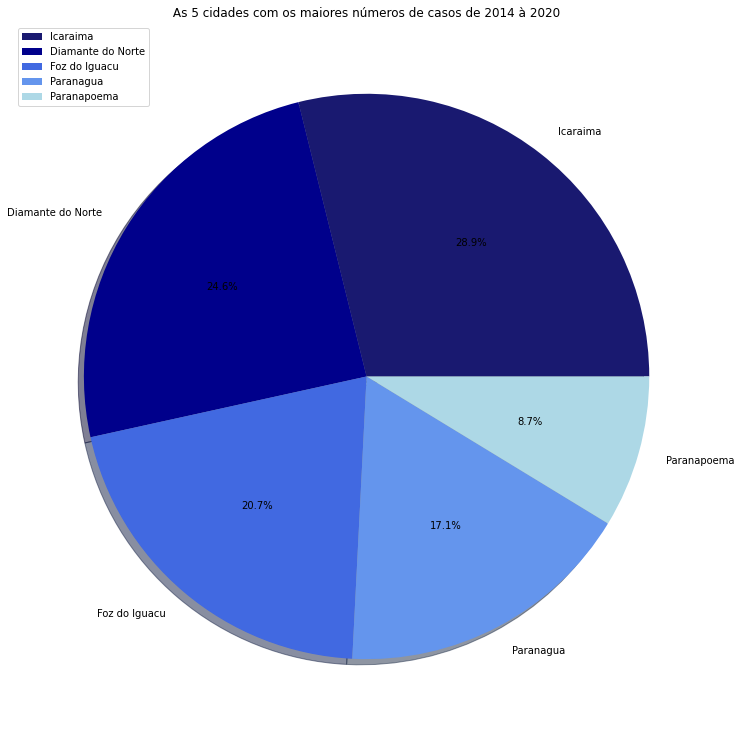

In [ ]:
plt.figure(figsize=(15,13))
total_cidades_top5= pd.read_csv('/content/drive/MyDrive/trabalho1CD/casos_normalizados/top5_normalizado.csv', sep = ';', encoding = 'latin-1')

labels = ['Icaraima', 'Diamante do Norte', 'Foz do Iguacu', 'Paranagua', 'Paranapoema']
values = [total_cidades_top5['Icaraima'][7:], total_cidades_top5['Diamante do Norte'][7:], total_cidades_top5['Foz do Iguacu'][7:], total_cidades_top5['Paranagua'][7:], total_cidades_top5['Paranapoema'][7:]]
cores = ['midnightblue', 'darkblue', 'royalblue', 'cornflowerblue', 'lightblue']
plt.pie(values, labels=labels, colors = cores, autopct = '%.1f%%', shadow = True)
plt.title(' As 5 cidades com os maiores números de casos de 2014 à 2020 ')
plt.legend()
plt.show()

O top 5 municípios que mais notificaram casos de dengue entre os anos de 2014 e 2020 foram Londrina (38227), Foz do Iguaçu (33975), Maringá (24414), Paranaguá (17846) e Marechal Cândido Rondon (2564). Contudo, normalizando os dados de uma maneira igualitária em relação à população, o top 5 municípios que mais notificaram casos de dengue normalizados entre os anos de 2014 e 2020 são, respectivamente: Icaraíma (18314), Diamante do Norte (15586), Foz do Iguaçu (13155), Paranaguá (10843) e Paranapoema (5523). O município de Paranaguá é o único que está na quarta posição em ambos top 5 municípios, também Foz do Iguaçu aparece em ambos.

---


Dessa maneira, entende-se o quão importante é avaliar os dados de maneira normalizada, pois resulta em valores diferentes e assim também na interpretação dos resultados.


# **Novas variáveis**

Até a primeira parte do trabalho, foram utilizadas apenas variáveis referentes ao clima dos municípios. Na segunda etapa, foram adicionadas novas variáveis, sendo elas a porcentagem de esgotamento adequado, o índice de desenvolvimento humano (IDH), o produto interno pruto (PIB) per capita e a população de cada município. Os dados foram retirados no site do IBGE [2].

Durante o tratamento dos dados do pib, percebeu-se que essa variável não influenciava diretamente nos casos de dengue. Desse modo, optou-se por retirá-la.

In [ ]:
pop_idh_esg.corr("spearman")

,Total casos norm,Porcentagem de esgotamento,Temperatura media,IDH
Total casos norm,1.000000,-0.301754,0.786395,-0.112281
Porcentagem de esgotamento,-0.301754,1.000000,-0.163570,0.717544
Temperatura media,0.786395,-0.163570,1.000000,-0.012582
IDH,-0.112281,0.717544,-0.012582,1.000000


Aplicando a correlação de Spearman nas demais, foi possível obter uma boa correlação entre os casos de dengue (já normalizados) e a temperatura média dos municípios, dos anos de 2014 à 2020, com 79%.

Já o idh não teve uma boa correlação, obtendo aproximadamente 11% e, por causa disso, resolvemos retirá-lo também.

O esgotamento, por sua vez, obteve 30% de correlação e será explorado a seguir.

## Relação entre os casos de dengue e esgotamento

Acredita-se que a variável de esgotamento obteve uma correlação razoável, mas que ela influencia significativamente nos casos, e para representar isso, foi criado o gráfico a seguir.

In [ ]:
pop_idh_esg = pd.read_csv('/content/drive/MyDrive/trabalho1CD/dados_teste/casos_idh_esgotamento_temp.csv', sep = ';', encoding = 'latin-1')

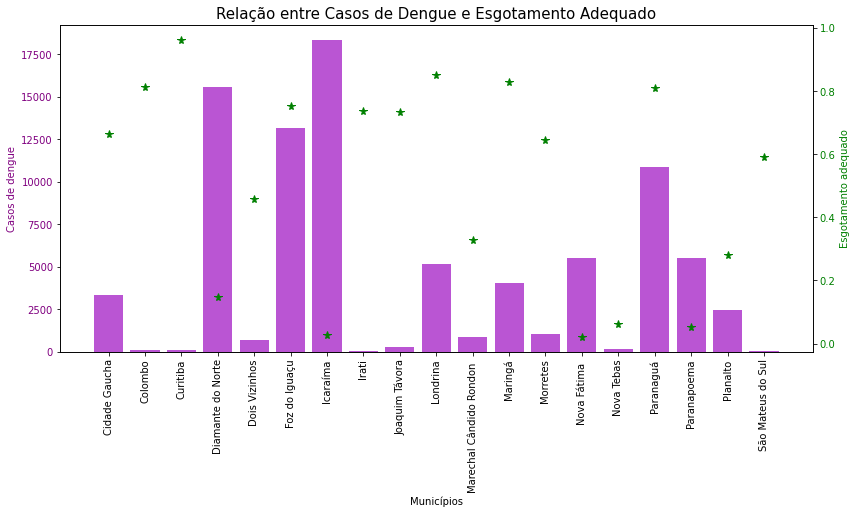

In [ ]:
municipios = pop_idh_esg['Municípios']
casos = pop_idh_esg['Total casos norm']
esgotamento = pop_idh_esg['Porcentagem de esgotamento']

fig, ax1 = plt.subplots()

ax1.set_xlabel('Municípios')
ax1.set_ylabel('Casos de dengue', color='purple')
ax1.bar(municipios, casos, color='mediumorchid', width=0.8, align='center')
ax1.tick_params(axis='y', labelcolor='purple')
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()

ax2.set_ylabel('Esgotamento adequado', color='green') 
ax2.plot(esgotamento, marker='*', markersize=8, linestyle=' ', linewidth=2, color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.tight_layout() 
plt.title('Relação entre Casos de Dengue e Esgotamento Adequado', fontsize=15)
plt.show()

O gráfico mostra os casos de dengue e a porcentagem de esgotamento adequado de cada um dos 19 municípios. Quanto mais adequado é o esgotamento da cidade, menor são os casos, como em Curitiba, que possui a maior porcentagem e um dos menores casos. Seguindo a mesma lógica, Diamante do Norte e Icaraíma possuem a porcentagem bem baixa, obtendo casos extremamente altos.

Já municípios como Foz do Iguaçu, Londrina e Paranaguá não se enquadram nessa relação: eles possuem boas condições de esgotamento, mas altos casos de dengue. Acreditamos que a justificativa seria pelo fato dessas cidades possuírem o clima mais propício para a proliferação da dengue, pois têm altas temperaturas.

# Distância Euclidiana

Foi feito também o calculo da distância euclidiana entre a temperatura média e os casos de dengue de alguns municípios em relação a Foz do Iguaçu, para mostrar que quanto mais próxima a temperatura de uma cidade é de Foz do Iguaçu, mais próximo é o número de casos.

Os municípios selecionados foram Curitiba, Colombo, Irati, Londrina e Maringá.

In [ ]:
fozdoiguacu_temp_media = pd.read_csv('/content/drive/MyDrive/trabalho1CD/dados_temp_media/fozdoiguacu_temp_media.csv', sep = ';', encoding = 'latin-1')
# fozdoiguacu_temp_media

In [ ]:
curitiba_temp_media = pd.read_csv('/content/drive/MyDrive/trabalho1CD/dados_temp_media/curitiba_temp_media.csv', sep = ';', encoding = 'latin-1')
# curitiba_temp_media

In [ ]:
londrina_temp_media = pd.read_csv('/content/drive/MyDrive/trabalho1CD/dados_temp_media/londrina_temp_media.csv', sep = ';', encoding = 'latin-1')
# londrina_temp_media

In [ ]:
maringa_temp_media = pd.read_csv('/content/drive/MyDrive/trabalho1CD/dados_temp_media/maringa_temp_media.csv', sep = ';', encoding = 'latin-1')
# maringa_temp_media

In [ ]:
irati_temp_media = pd.read_csv('/content/drive/MyDrive/trabalho1CD/dados_temp_media/irati_temp_media.csv', sep = ';', encoding = 'latin-1')
# irati_temp_media

In [ ]:
colombo_temp_media = pd.read_csv('/content/drive/MyDrive/trabalho1CD/dados_temp_media/colombo_temp_media.csv', sep = ';', encoding = 'latin-1')
# colombo_temp_media

In [ ]:
total_cidades_top5 = pd.read_csv('/content/drive/MyDrive/trabalho1CD/total_cidades_top5.csv', sep = ';', encoding = 'latin-1')
fozdoiguacu_casos_total = total_cidades_top5['Foz do Iguaçu'][7:]

In [ ]:
# casos de dengue total de londrina:
londrina_casos_total = 5135

# casos de dengue total de maringa:
maringa_casos_total = 4044

# casos de dengue total de curitiba:
curitiba_casos_total = 83

# casos de dengue total de colombo:
colombo_casos_total = 101

# casos de dengue total de irati:
irati_casos_total = 28

# casos de dengue total de foz:
fozdoiguacu_casos_total = 13155

In [ ]:
# distância euclidiana da temperatura média de curitiba com foz:
a_min_b = fozdoiguacu_temp_media-curitiba_temp_media
dist_euclid_curitiba = np.sqrt(np.einsum('ij,ij->j', a_min_b, a_min_b))
dist_euclid_curitiba

array([10.77032961, 11.04536102,  7.74596669,  8.71779789,  8.30662386,
        6.32455532,  5.65685425,  7.87400787, 10.09950494, 14.52583905,
       14.        , 10.95445115])

In [ ]:
# distância euclidiana da temperatura média de londrina com foz:
a_min_b = fozdoiguacu_temp_media-londrina_temp_media
dist_euclid_londrina = np.sqrt(np.einsum('ij,ij->j', a_min_b, a_min_b))
dist_euclid_londrina

array([2.        , 2.64575131, 4.24264069, 3.60555128, 2.44948974,
       3.        , 2.82842712, 2.64575131, 3.31662479, 4.        ,
       2.44948974, 1.73205081])

In [ ]:
# distância euclidiana da temperatura média de maringa com foz:
a_min_b = fozdoiguacu_temp_media-maringa_temp_media
dist_euclid_maringa = np.sqrt(np.einsum('ij,ij->j', a_min_b, a_min_b))
dist_euclid_maringa

array([2.23606798, 2.23606798, 4.24264069, 4.        , 4.47213595,
       4.79583152, 6.        , 6.08276253, 5.83095189, 4.        ,
       3.31662479, 1.73205081])

In [ ]:
# distância euclidiana da temperatura média de colombo com foz:
a_min_b = fozdoiguacu_temp_media-colombo_temp_media
dist_euclid_colombo = np.sqrt(np.einsum('ij,ij->j', a_min_b, a_min_b))
dist_euclid_colombo

array([11.13552873, 11.22497216,  8.        , 10.        , 10.67707825,
        9.59166305,  9.43398113, 11.04536102, 12.20655562, 16.15549442,
       15.23154621, 11.44552314])

In [ ]:
# distância euclidiana da temperatura média de irati com foz:
a_min_b = fozdoiguacu_temp_media-irati_temp_media
dist_euclid_irati = np.sqrt(np.einsum('ij,ij->j', a_min_b, a_min_b))
dist_euclid_irati

array([11.        , 11.09053651,  8.06225775, 11.35781669, 12.80624847,
       10.77032961, 11.74734012, 12.60952021, 11.26942767, 14.35270009,
       11.44552314, 10.19803903])

In [ ]:
# array com as médias da distância euclidiana de foz com os municípios:
dist_eclid = [dist_euclid_curitiba, dist_euclid_colombo, dist_euclid_irati, dist_euclid_maringa, dist_euclid_londrina]

# array de casos de dengue total dos municípios: 
casos_dengue_total = [curitiba_casos_total, colombo_casos_total, irati_casos_total, maringa_casos_total, londrina_casos_total]

In [ ]:
# média da distância euclidiana de foz com curitiba:
dist_euclid_curitiba = dist_euclid_curitiba.mean()

# média da distância euclidiana de foz com londrina:
dist_euclid_londrina = dist_euclid_londrina.mean()

# média da distância euclidiana de foz com londrina:
dist_euclid_maringa = dist_euclid_maringa.mean()

# média da distância euclidiana de foz com colombo:
dist_euclid_colombo = dist_euclid_colombo.mean()

# média da distância euclidiana de foz com irati:
dist_euclid_irati = dist_euclid_irati.mean()

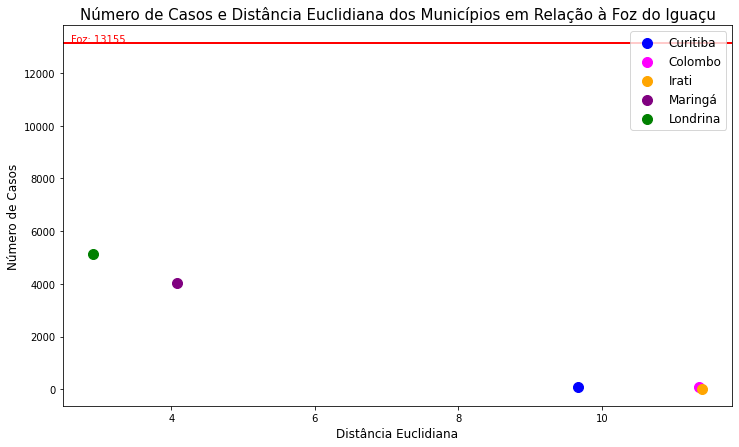

In [ ]:
colors = ['blue', 'magenta', 'orange', 'purple', 'green']

curitiba = plt.scatter(dist_euclid_curitiba, curitiba_casos_total, color=colors[0], s=100)
colombo = plt.scatter(dist_euclid_colombo, colombo_casos_total, color=colors[1], s=100)
irati = plt.scatter(dist_euclid_irati, irati_casos_total, color=colors[2], s=100)
maringa = plt.scatter(dist_euclid_maringa, maringa_casos_total, color=colors[3], s=100)
londrina = plt.scatter(dist_euclid_londrina, londrina_casos_total, color=colors[4], s=100)

plt.legend((curitiba, colombo, irati, maringa, londrina), ('Curitiba', 'Colombo', 'Irati', 'Maringá', 'Londrina'), loc='upper right', ncol=1, fontsize=12)

plt.title('Número de Casos e Distância Euclidiana dos Municípios em Relação à Foz do Iguaçu', fontsize=15)

plt.ylabel('Número de Casos', fontsize=12)
plt.xlabel('Distância Euclidiana', fontsize=12)

plt.text(x=2.6, y=13155, s="Foz: 13155", color='r')
plt.axhline(13155, linewidth=2, color='r')

plt.rcParams['figure.figsize'] = (12,7) # escala do gráfico

plt.show()

No gráfico, cada ponto é representado por um município, e quanto mais próximo à zero no eixo x, mais próximo é a temperatura média daquele município em relação à Foz. A temperatura de Londrina, por exemplo, é quase igual a de Foz, e o número de casos é relativamente alto se comparado aos outros. Já Colombo e Irati têm a temperatura totalmente diferente de Foz, e os casos são muito baixos.

Desse modo, é possível notar que a relação é coerente.

# Regressão Linear Simples

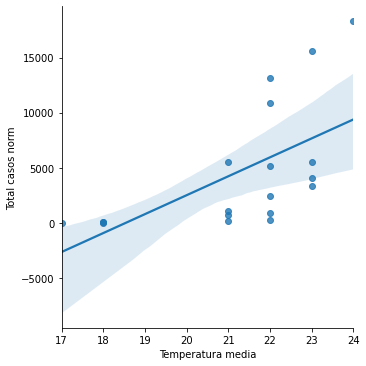

In [ ]:
import seaborn as sns

sns.lmplot(x='Temperatura media', y='Total casos norm', data=pop_idh_esg, markers='o')

Fazendo a regressão linear simples do total de casos de dengue e a temperatura média de cada município, do ano de 2014 à 2020, percebe-se que há uma relação linear entre as duas variáveis: quanto maior a temperatura, maior o número de casos. Mas essa relação não é totalmente congruente, pois alguns pontos estão dispersos da reta.

# Regressão Linear por Mínimos Quadrados Ordinários (MQO/OLS)

Durante o trabalho foram pesquisados métodos e conceitos de estatísticas para visualizar melhor o comportamento dos dados. Outro método escolhido foi **Regressão Linear por Mínimos Quadrados Ordinários (MQO) .**

O método de estimação dos Mínimos Quadrados Orginários do inglês Ordinary Least Squares - OLS, é uma método de otimização que procura o melhor ajusto do modelo através da minimização dos quadrados do erro da regressão [4].

É um método muito utilizada como método de previsão e tem como objetivo principal verificar como determinadas variáveis de interesse influenciam em uma variável de resposta [3].
 
No entanto, o MQO tem alguns requisitos que precisam ser respeitados, caso contrário, os resultados tentem a ficar enviesados. Sende um desses requisitos:

A relação entre a variável resposta e os preditores ser linear. 

Os dados utilizados nesse trabalho não são totalmente lineares, pois há algumas exceções que mudam o comportamento dos dados, e esse fator refletiu diretamente nos resultados, como será apresentado a seguir. 

A regressão linear é uma técnica de análise estatística que possibilia estimar o valor de uma determinada variável resposta (variável dependente) como função de outras variáveis preditoras (variáveis independentes).

Para estimar o modelo utilizamos a biblioteca **Statsmodels.api** e chamamos a função **.ols**

Dados utilizados para a Regressão MQO:

Tabela: casos_idh_esgotamento_temp.csv

Dados:
*   Temperatura média de 2014 à 2020 de cada Município
*   Total de Casos de Dengue de cada município, normalizado para 100 mil habitantes. 

Como:

**Variável dependente:** utilizamos a coluna 'Total de Casos de Dengue'.

**Variável independente:** utilizamos a coluna 'Temperatura Média'.

Segundo a definição, deve-se colocar como **'Variável dependente'** o que quer prever.

Objetivo: dada a temperatura média de cada município de 2014 a 2020 e o total de casos de dengue normalizado para cada munícípio, o objetivo era verificar como a temperatura influencia nos casos de dengue. 


In [ ]:
# verificando se foi lido corretamente o arquivo casos_idh_esgotamento_temp.csv
pop_idh_esg.head()

,Municípios,Total casos norm,Porcentagem de esgotamento,Temperatura media,IDH
0,Cidade Gaucha,3339,0.664,23,0.718
1,Colombo,101,0.813,18,0.733
2,Curitiba,83,0.963,18,0.823
3,Diamante do Norte,15586,0.147,23,0.723
4,Dois Vizinhos,697,0.458,21,0.767


In [ ]:
#importante a biblioteca e setando as variáveis que vamos utilizar na chamada da função OLS
import statsmodels.api as sm

totalcasos = pop_idh_esg['Total casos norm'] #y
temperaturamedia = sm.add_constant(pop_idh_esg['Temperatura media']) #x

In [ ]:
# chamada da função da Regressão, OLS de Ordinary Least Squares
regressao_norm = sm.OLS(totalcasos, temperaturamedia).fit()
print(regressao_norm.summary2())

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.327     
Dependent Variable:      Total casos norm    AIC:                   377.1322  
Date:                    2021-04-25 23:29    BIC:                   379.0211  
No. Observations:        19                  Log-Likelihood:        -186.57   
Df Model:                1                   F-statistic:           9.744     
Df Residuals:            17                  Prob (F-statistic):    0.00621   
R-squared:               0.364               Scale:                 2.2118e+07
------------------------------------------------------------------------------
                     Coef.     Std.Err.     t    P>|t|     [0.025     0.975]  
------------------------------------------------------------------------------
const             -31809.4525 11712.2631 -2.7159 0.0147 -56520.1677 -7098.7374
Temperatura media   1716.3216   549.8431  3.1215 0.0062    556.2540  2876.38

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=19



Explicando algumas variáveis importantes da *table* resultado.

 

*   R-squared: R é a medida de quanto temperatura média é explicado por mudanças em total de casos

Por exemplo, nosso modelo explica 0.364, ou seja, 36,4% da mudança da variável 'Total de Casos'

*   P > |t| usa a **estatística t** para produzir o **valor p**. Uma medida da probabilidade de seu coeficiente ser medido por meio de nosso modelo por acaso. 

Significa que a temperatura média tem 0.0062 (0,6%)  de chance de **não afetar** a variável dependente, que seria o número de Total de Casos. Ou seja, a porcentagem de chance de não afetar é baixíssima, em outras palavras, a temperatura **tem** chance de afetar o número total de casos, isto é, influenciar no número de casos.

# Referência
[1] Disponível em: <http://joinville.ifsc.edu.br/~joni.fusinato/GH%20-%20EST22/Aulas/Aula%202%20-%20Indicadores,%20taxas%20e%20coeficientes.pdf>. Acesso em: 24 abr. 2021.

[2] Disponível em: <https://cidades.ibge.gov.br/brasil/pr/panorama>. Acesso em: 9 abr. 2021.

[3] SILVA. Uma visão geral sobre machine learning - Regressão e Clustering - Oper. Disponível em: <https://operdata.com.br/blog/uma-visao-geral-sobre-machine-learning-regressao-clustering/#:~:text=A%20Regress%C3%A3o%20%C3%A9%20um%20dos,valores%20de%20vari%C3%A1veis%20preditoras%20X.>. Acesso em: 25 abr. 2021.

[4]NEYLSON CREPALDE. Regressão Linear com Python. Disponível em: <https://neylsoncrepalde.github.io/2018-02-25-regressao-linear-python/>. Acesso em: 25 abr. 2021